## <span style="color:rgb(25,25,112)">Import des bibliotheques</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
%matplotlib inline

## <span style="color:rgb(25,25,112)">Import du fichier CSV</span>


In [2]:
df = pd.read_csv('music_genre.csv', header=0)

**Premières 5 lignes de notre DataFrame**

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


**Info sur les colonnes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

**Obtenir des statistiques de base sur les données <span style="color:red">numériques</span> :**

In [5]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


**Obtenir des statistiques de base sur les données <span style="color:red">qualitatives</span> :**

In [6]:
df.describe(include = object)

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


> Les valeurs `empty_field` et `?` dans le dataset sont traitées comme des chaînes valides au lieu de valeurs manquantes, nécessitant leur conversion en `NaN` pour une gestion correcte.

## <span style="color:rgb(25,25,112)">Préparation de données</span>


**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">avant</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [7]:
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

**Remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>**

In [8]:
df.replace(['empty_field', '?'], np.nan, inplace=True)

**Compte du nombre de valeurs manquantes par colonne (<span style="color:green">après</span> remplacement de <span style="color:red">empty_field</span> et <span style="color:red">?</span>)**

In [9]:
df.isnull().sum()

instance_id            5
artist_name         2494
track_name             5
popularity             5
acousticness           5
danceability           5
duration_ms            5
energy                 5
instrumentalness       5
key                    5
liveness               5
loudness               5
mode                   5
speechiness            5
tempo               4985
obtained_date          5
valence                5
music_genre            5
dtype: int64

**Remplacement sur les données <span style="color:red">numériques</span> :**

In [10]:
# Création d'un impute pour remplacer les valeurs manquantes des colonnes numériques
imputer_num = SimpleImputer(strategy="median")

# Sélection
numerical_cols = df.select_dtypes(include=['float64']).columns

# Application de l'impute sur les colonnes numériques
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


**Remplacement sur les données <span style="color:red">qualitatives/catégoriels</span> :**

In [11]:
# Création d'un impute pour les attributs catégoriels
imputer_cat = SimpleImputer(strategy="most_frequent")

# Sélection
categorical_cols = df.select_dtypes(include=['object']).columns

# Application de l'impute sur les colonnes catégorielles
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


**Supprimer `music_genre`, pour que le modèle ne soit pas influencé par cette colonne**

In [12]:
# Supprimer la colonne 'music_genre' et la stocker dans une variable séparée
labels = df['music_genre'].copy()
df = df.drop('music_genre', axis=1)


**Suppression des Colonnes Inutiles**


In [13]:
df.drop(['artist_name', 'track_name', 'obtained_date'], axis=1, inplace=True)

**Convertir tempo en Type Numérique**

In [14]:
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

>La colonne `tempo` contient des valeurs numériques, mais elle est stockée en tant que type objet,

**Encodage des Données Catégorielles**

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,32894.0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,...,0,0,1,0,0,0,0,0,0,1
2,30097.0,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,...,0,0,0,0,0,0,0,0,1,0
3,62177.0,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,...,0,1,0,0,0,0,0,0,0,0
4,24907.0,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,...,0,0,0,0,0,0,1,0,0,0


> l'encodage One-Hot créera une nouvelle colonne pour chaque catégorie unique des données catégorielles, avec des 1 et des 0 indiquant la présence d'une catégorie pour chaque observation 

## <span style="color:rgb(25,25,112)">K-means model</span>

**Standardisation des données numériques**

In [16]:
# Création d'un objet StandardScaler
scaler = StandardScaler()

# Application de la standardisation aux caractéristiques numériques
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

>La standardisation des données numériques assure que chaque caractéristique contribue équitablement au modèle, évitant ainsi que les variables à grande échelle dominent indûment le processus d'analyse.

**Nombre de clusters**

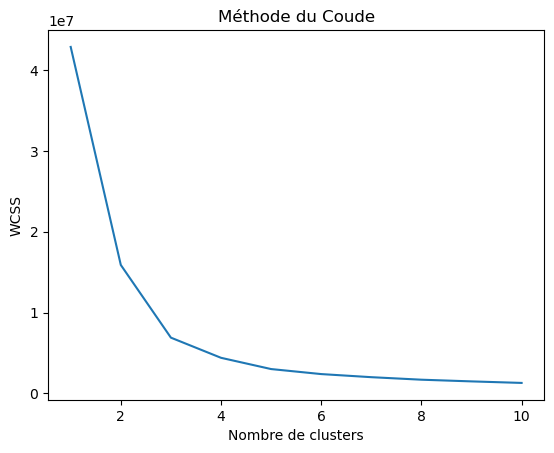

In [17]:
# utilisation de la méthode du coude pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

>Le coude se situe autour de 2 ou 3 clusters, où la courbe commence à s'aplatir.

**K-means**

In [18]:
k_optimal = 3 #selon le graphique

# Application de K-means avec le nombre de clusters choisi
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans_final.fit(df)

# Les étiquettes de cluster pour chaque point de données
clusters = kmeans_final.labels_

df['Cluster_Labels'] = clusters

**Distribution des Genres Musicaux par Cluster**

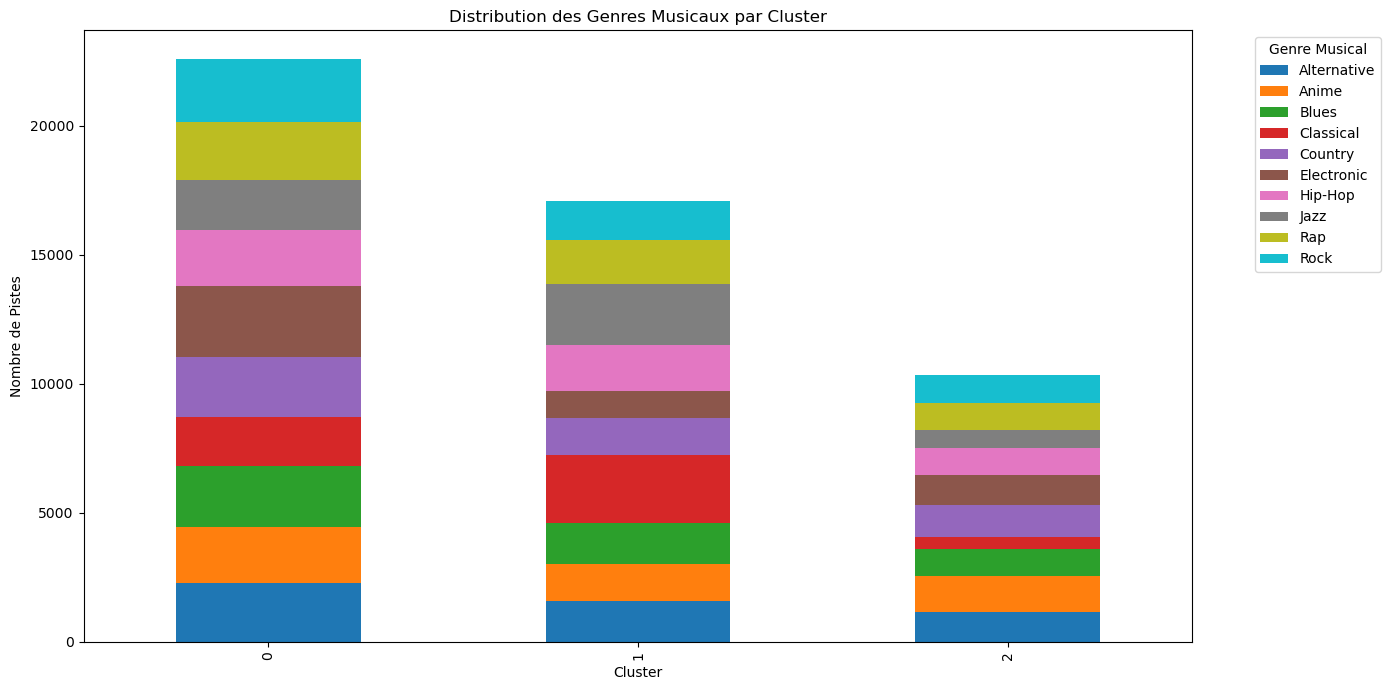

In [19]:
# labels' contient vos genres musicaux et que 'clusters' contient les étiquettes de clusters
visualization_df = pd.DataFrame({'Cluster_Labels': clusters, 'Music_Genre': labels})

# Créer un tableau croisé pour compter les genres par cluster
cluster_genre_counts = pd.crosstab(visualization_df['Cluster_Labels'], visualization_df['Music_Genre'])

# Utiliser un graphique à barres empilées pour visualiser les résultats
cluster_genre_counts.plot(kind='bar', stacked=True, figsize=(14, 7))

# Ajouter des titres et des légendes
plt.title('Distribution des Genres Musicaux par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de Pistes')
plt.legend(title='Genre Musical', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


**Score Silhouette**

In [20]:
silhouette_avg = silhouette_score(df.drop('Cluster_Labels', axis=1), df['Cluster_Labels'])
print(f"Le score moyen de silhouette est : {silhouette_avg}")


Le score moyen de silhouette est : 0.5540550990163203


>Avec un score moyen de silhouette de 0.554, l'algorithme K-means a formé des clusters bien définis, indiquant une bonne séparation entre les clusters et une cohérence interne satisfaisante. Ce score suggère que les points sont généralement bien groupés.

<ul>
    <li>k=2  : 0.5250511154850809</li>
    <li>k=3  : 0.5540550990163203</li>
    <li>k=4  : 0.5233961290457287</li>
    <li>k=5  : 0.5047728852899933</li>
    <li>k=10 : 0.4030517955757374</li>
</ul>


## <span style="color:rgb(25,25,112)">Matrice de confusion</span>

**Rajouter les genres musicaux au DataFrame**

In [21]:
df['music_genre'] = labels

**Nombre de titres dans chaque cluster par genre musical**

In [22]:
# Créer un DataFrame qui combine les labels de clusters et les genres musicaux
combined_df = pd.concat([df['Cluster_Labels'], labels], axis=1)

# la répartition des genres par cluster
genre_by_cluster = pd.crosstab(combined_df['Cluster_Labels'], combined_df['music_genre'])

# Affichage
genre_by_cluster.head()


music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
Cluster_Labels,,,,,,,,,,
0,2272,2181,2376,1868,2352,2737,2167,1955,2256,2406
1,1575,1430,1592,2648,1419,1075,1782,2362,1707,1498
2,1158,1389,1032,484,1229,1188,1051,683,1037,1096


> Pour chaque cluster, on prend le genre musical le plus représenté comme étiquette pour ce cluster. Cela va nous aider à construire un dictionnaire de mappage qui pourra ensuite être utilisé pour comparer les étiquettes de cluster avec les genres musicaux réels.

**Etape 1: Mappage**

In [23]:
# Les genres les plus fréquents dans chaque cluster. (voir Out[25])
cluster_to_genre = {
    0: 'Electronic',
    1: 'Classical',
    2: 'Anime'
}

**Etape 2: Attribution des Genres Prédits selon le Mappage**

In [24]:
predicted_genres = [cluster_to_genre[cluster] for cluster in clusters]

**Etape 3: Création de la Matrice de Confusion**

In [25]:
from sklearn.metrics import confusion_matrix
import pandas as pd

true_genres = df['music_genre'][df.index]

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_genres, predicted_genres, labels=list(cluster_to_genre.values()))

# Créer le DataFrame pour la matrice de confusion pour une meilleure lisibilité
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=cluster_to_genre.values(),  # Les genres musicaux réels (prédits) comme index
    columns=cluster_to_genre.values()  # Les genres musicaux prédits comme colonnes
)

print(conf_matrix_df)


            Electronic  Classical  Anime
Electronic        2737       1075   1188
Classical         1868       2648    484
Anime             2181       1430   1389


<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; }
        table { border-collapse: collapse; width: 60%; }
        table, th, td { border: 1px solid black; }
        th, td { padding: 8px; text-align: left; }
        th { background-color: #f2f2f2; }
    </style>
</head>
<body>
    <h2 style="color:rgb(25,25,112)"> Interprétation du Clustering des Genres Musicaux</h2>
    <p>
        Dans notre étude, nous avons associé à chaque cluster, un genre musical spécifique en fonction du genre le plus fréquent
        au sein du cluster. Les genres musicaux considérés étaient "Electronic", "Classical", et "Anime".
    </p>
    <p>
        La matrice de confusion suivante montre comment les morceaux de musique ont été classés dans les clusters
        et comment ces clusters ont été mappés aux genres musicaux prédits :
    </p>
    <table>
        <tr>
            <th>Genre Réel / Prédit</th>
            <th>Electronic</th>
            <th>Classical</th>
            <th>Anime</th>
        </tr>
        <tr>
            <td>Electronic</td>
            <td>2737</td>
            <td>1075</td>
            <td>1188</td>
        </tr>
        <tr>
            <td>Classical</td>
            <td>1868</td>
            <td>2648</td>
            <td>484</td>
        </tr>
        <tr>
            <td>Anime</td>
            <td>2181</td>
            <td>1430</td>
            <td>1389</td>
        </tr>
    </table>
    <p>
        L'analyse de cette matrice révèle que le modèle a relativement bien performé pour classifier les morceaux
        "Electronic" et "Classical". Cependant, il y a eu des confusions notables, notamment entre "Electronic"
        et "Anime", ainsi qu'entre "Electronic" et "Classical".
    </p>
    <h3 style="color:rgb(25,25,112)">Exemple "Electronic"</h3>
    <ul>
        <li>2737 morceaux "Electronic" ont été correctement prédits comme "Electronic".</li>
        <li>1075 morceaux "Electronic" ont été prédits à tort comme "Classical".</li>
        <li>1188 morceaux "Electronic" ont été prédits à tort comme "Anime".</li>
    </ul>

</body>
</html>
